<h3 style="text-align: center;">Big Data Analytics</h3>

## Project Overview:

- The primary objective of this project is to develop a robust machine learning model capable of accurately detecting emotions from facial images. This project leverages the Real-world Affective Faces (RAF) Database, a widely recognized dataset in the field of emotion recognition, to train and evaluate a deep learning model. The project is structured into the following key phases:

- **Data Collection**: The dataset used in this project is sourced from the Real-world Affective Faces (RAF) Database. This dataset comprises a diverse collection of facial images, capturing a broad range of emotions across different demographics, including various ages, genders, and ethnicities. Such diversity is essential for training a model that can generalize well across different segments of the population..

- **Data Preprocessing**: Once the RAF Face Database is obtained, the images are subjected to several preprocessing steps to prepare them for analysis. These preprocessing steps include resizing, normalization, and data augmentation techniques to enhance the robustness of the model and ensure it is exposed to various conditions during training. 

- **Feature Extraction**: Feature extraction is performed using convolutional neural networks (CNNs). The CNNs are trained to identify and extract crucial features such as lip movement, smiles, eye movement, mouth shape, and eyebrow position. These features are vital for distinguishing between different emotions in facial images.

- **Model Development and training** : The core of this project involves developing and training a deep learning model based on the CNN architecture. The model is designed to learn the unique features associated with each emotion. For instance, the model will learn to recognize that a happy face typically includes a smile, while an angry face may exhibit furrowed eyebrows. The training process focuses on optimizing the model's parameters to maximize its predictive accuracy.

- **Model Evaluation**: We will evaluate the performance of our deep learning model for its prediction accuracy on unseen validation data.







<ul><li>We are using a dataset that contains 15339 labled images showing seven different emotions, such as:-1: Surprise, 2: Fear, 3: Disgust, 4: Happiness, 5: Sadness, 6: Anger, 7: Neutral.

In [7]:
# Import necessary libraries
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import os
from PIL import Image
import pandas as pd


In [118]:
#import warnings and set it off
import warnings
warnings.filterwarnings('ignore')

In [9]:
#import libraries for image processing and a prebuilt module to extract image links from folder
from PIL import Image
import get_link_list

image_links, image_names = get_link_list.lists('Big_Data/Project/emotion/aligned/')

In [10]:
#check for a sample image
image = Image.open(image_links[100])
img_array = img_to_array(image)
img_array.shape

(100, 100, 3)

<ul><li>in next step we sahll load the labeled information and save it as a dataframe

In [15]:
# Load and preprocess the text corpus
file = 'Big_Data/Project/emotion/list_patition_label.txt'

# Read the text file as a pandas dataframe with space as the delimiter
label_df = pd.read_csv(file, sep=' ', header=None, names=['image_name', 'id'])

# check the dataframe
label_df.head()

,image_name,id
0,train_00001.jpg,5
1,train_00002.jpg,5
2,train_00003.jpg,4
3,train_00004.jpg,4
4,train_00005.jpg,5


<ul><li>Now we will create our training and testing sets by looping through the items in image folder, and assigning them to X-train and X-test lists. 
    <li>Then we will iterate through the label dataframe and assign the labels to y-train and y-test.

In [87]:
#define the path of image files
path = 'Big_Data/Project/emotion/aligned/'
#assign empty lists 
X_train=[]
y_train=[]
X_test=[]
y_test=[]
#iterste through all images in folder and assign items to X train and X test
for i in image_links:
    if 'train' in i:
        X_train.append(i)
    elif 'test' in i:
        X_test.append(i)
#iterate through the label dataframe and assign labels to ytrain and y test    
for i in range(len(label_df)):
    if 'train' in label_df.iloc[i][0]:
        y_train.append(label_df.iloc[i][1])
    elif 'test' in label_df.iloc[i][0]:
        y_test.append(label_df.iloc[i][1])
    

In [88]:
#convert y train and y test to numpy array
y_train= np.array(y_train)
y_test= np.array(y_test)

In [90]:
#visualize the shape of y train and y test
print(y_train.shape, y_test.shape)

(12271,) (3068,)


<ul><li>function is to preprocess the images in the X_train and X_test lists and convert them into numpy arrays of a specified size.the function loops over each file name in the X_train list, and converts it into numpy array using keras.preprocessing.image function.After that it normalizes the pixel values and appends the arrayas to train and test sets.

In [91]:
#define process to convert the images in numpy array and to create list of those arrays for trainig and testing
def preprocess_images(X_train,X_test,IMAGE_SIZE):
    train_images = []
    test_images=[]
    for file in X_train:             
        img = load_img(file, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        # Convert image to numpy array
        img_array = img_to_array(img)
        # Scale pixel values to range [0, 1]
        img_array /= 255.0
        # Append image to list of images
        train_images.append(img_array)
    for file in X_test:             
        img = load_img(file, target_size=(IMAGE_SIZE, IMAGE_SIZE))
        # Convert image to numpy array
        img_array = img_to_array(img)
        # Scale pixel values to range [0, 1]
        img_array /= 255.0
        # Append image to list of images
        test_images.append(img_array)
 

    return train_images, test_images

In [37]:
#apply the function on X train and X test sets 
img_train, img_test =preprocess_images(X_train,X_test,64)

In [41]:
#Convert the train and test sets to numpy arrays
img_train=np.array(img_train)
img_test=np.array(img_test)

In [119]:
#visualize the shape
print(img_train.shape, img_test.shape)

(12271, 64, 64, 3) (3068, 64, 64, 3)


<ul><li>Now, to use the Ytrain and Y test arrays in our deep learning model, we  should convert them in categorical variables by using one hot encoding technique. We sahll use keras- to categorical utitility function for this purpose.

In [147]:
# Convert the labels to one-hot encoded format
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

<ul><li>In next step, we shall define our CNN model for this task

In [47]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=img_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [48]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
# Train the model
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(img_train)


In [54]:
#fit the model with our training and validation data
history= model.fit_generator(datagen.flow(img_train, y_train, batch_size=64), steps_per_epoch=img_train.shape[0] // 64, epochs=20, validation_data=(img_test, y_test))


Epoch 1/20
191/191 [==============================] - 148s 773ms/step - loss: 0.8660 - accuracy: 0.6895 - val_loss: 0.7650 - val_accuracy: 0.7353
Epoch 2/20
191/191 [==============================] - 158s 826ms/step - loss: 0.8545 - accuracy: 0.6945 - val_loss: 0.7115 - val_accuracy: 0.7588
Epoch 3/20
191/191 [==============================] - 150s 781ms/step - loss: 0.8425 - accuracy: 0.6999 - val_loss: 0.7050 - val_accuracy: 0.7516
Epoch 4/20
191/191 [==============================] - 165s 864ms/step - loss: 0.8424 - accuracy: 0.6968 - val_loss: 0.6896 - val_accuracy: 0.7552
Epoch 5/20
191/191 [==============================] - 167s 873ms/step - loss: 0.8396 - accuracy: 0.7008 - val_loss: 0.6993 - val_accuracy: 0.7591
Epoch 6/20
191/191 [==============================] - 191s 1s/step - loss: 0.8427 - accuracy: 0.6998 - val_loss: 0.6862 - val_accuracy: 0.7624
Epoch 7/20
191/191 [==============================] - 194s 1s/step - loss: 0.8305 - accuracy: 0.7062 - val_loss: 0.7154 - val_a

In [53]:
# Evaluate the model
scores = model.evaluate(img_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


96/96 [==============================] - 5s 49ms/step - loss: 0.7192 - accuracy: 0.7428
Test loss: 0.719174325466156
Test accuracy: 0.7428292036056519


<ul><li>We shall try with other configurations to check if we can improve our prediction accuracy

In [149]:
#initialize the model with three Conv layers
from keras import layers
from keras import models 
from keras import backend as K
inputs = keras.Input(shape=(64, 64, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(inputs)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(2,2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(inputs)
x = layers.Flatten()(x)
outputs = layers.Dense(8, activation="softmax")(x)
model_2 = keras.Model(inputs=inputs, outputs=outputs)

In [150]:
# Compile the model
model_2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [151]:
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(img_train)

In [154]:
#fit the model with our training and validation data
history= model_2.fit_generator(datagen.flow(img_train, y_train, batch_size=64), steps_per_epoch=img_train.shape[0] // 64, epochs=5, validation_data=(img_test, y_test))


Epoch 1/5
191/191 [==============================] - 55s 286ms/step - loss: 1.3312 - accuracy: 0.5263 - val_loss: 1.1694 - val_accuracy: 0.5919
Epoch 2/5
191/191 [==============================] - 57s 298ms/step - loss: 1.3204 - accuracy: 0.5287 - val_loss: 1.1481 - val_accuracy: 0.5939
Epoch 3/5
191/191 [==============================] - 58s 303ms/step - loss: 1.2975 - accuracy: 0.5366 - val_loss: 1.2233 - val_accuracy: 0.5541
Epoch 4/5
191/191 [==============================] - 57s 300ms/step - loss: 1.2943 - accuracy: 0.5385 - val_loss: 1.1769 - val_accuracy: 0.5675
Epoch 5/5
191/191 [==============================] - 58s 306ms/step - loss: 1.2804 - accuracy: 0.5449 - val_loss: 1.5252 - val_accuracy: 0.5075


<ul><li>We tried to improve the accuracy by applying other configurations but the maximum accuracy we could achieve is 74% in test data

<ul><li>Our model gives 74% accuracy on test data, as we are trying to classify seven different emotions, we found the model to be useful and decided to select it for our use.

In [77]:
#define a dictionary for the emotions
emotion_dict={1:'Surprise',2:'Fear',3:'Disgust',4:'Happiness',5:'Sadness',6:'Anger',7:'Neutral'}

In [81]:
#predict with our best model
pred = model.predict(img_test)

96/96 [==============================] - 4s 43ms/step


<ul><li>We sahll define a function to call our model and randomly select images from the test set and predict the emotional level for that image.

In [104]:
#import the required modules
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
#define the function to loop on random test images and predict its emotion
def create_emotion_image(n):
    for j in range(n):
        i = random.randint(0,len(X_test))
        prediction=np.argmax(pred[i])
        label=emotion_dict[prediction]
        fig, ax = plt.subplots(figsize=(3, 3))
        pic = np.array(mpimg.imread(X_test[i]))
        ax.set_title(label)
        ax.set(xticks=[], yticks=[]);
        ax.imshow(pic);

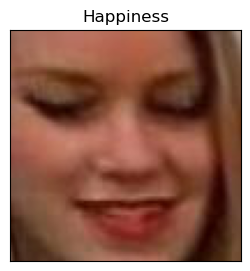

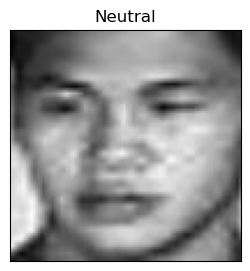

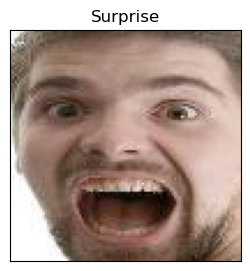

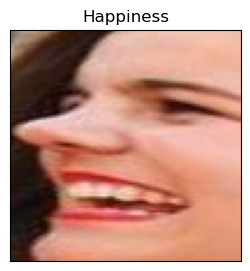

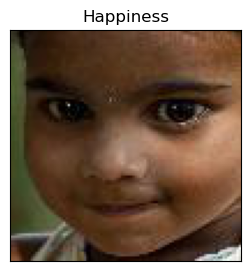

In [108]:
#call the prediction function
create_emotion_image(5)

<ul>Conclusion:

<li>Emotion detection from images is a challenging problem, but with the power of big data and machine learning, we can develop accurate and reliable models to address this problem. By following the steps outlined in this project, we can develop a model that can be used for a variety of applications, from improving customer experience to analyzing social media sentiment